In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/statistical-performance-indicators-spis/SPI_index_2018-22.csv


In [2]:
#This libraryprovides tools for analyzing and handling seasonal components in time series data.
from statsmodels.tsa.seasonal import seasonal_decompose
#This library provides tools for fitting and forecasting ARIMA (AutoRegressive Integrated Moving Average) models,
# which are widely used for time series forecasting.
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
#The Simple Imputer class from sklearn.impute is a useful tool for handling missing values in datasets.
from sklearn.impute import SimpleImputer

In [4]:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)


file_path = '/kaggle/input/statistical-performance-indicators-spis/SPI_index_2018-22.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [5]:
#To handle the null value SimpleImputer is done as a part of data pre processing

# Identify numerical columns for handling missing value
numerical_columns = df.select_dtypes(include=['number']).columns

#SimpleImputer is For handling the missing data in the predictive model dataset.It replaces the NaN values with a
# specified placeholder
imputer =SimpleImputer(missing_values=np.nan,strategy='most_frequent')
numerical_columns_df=pd.DataFrame(imputer.fit_transform(df[numerical_columns]),columns=numerical_columns)

# Identify categorical columns and convert it into date frame
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns_df=pd.DataFrame(df[categorical_columns],columns=categorical_columns)

df=pd.concat([numerical_columns_df,categorical_columns_df],axis=1)
df['year'] = df['year'].astype(int)

# To check  the total number of missing values in the data frame after simple imputer.
print(df.isnull().sum())

year                                0
Pillar 1  - Data Use - Score        0
Pillar 2 - Data Services - Score    0
Pillar 3 - Data Products - Score    0
Pillar 4 - Data Sources - Score     0
                                   ..
population                          0
country                             0
iso3c                               0
income                              0
region                              0
Length: 79, dtype: int64


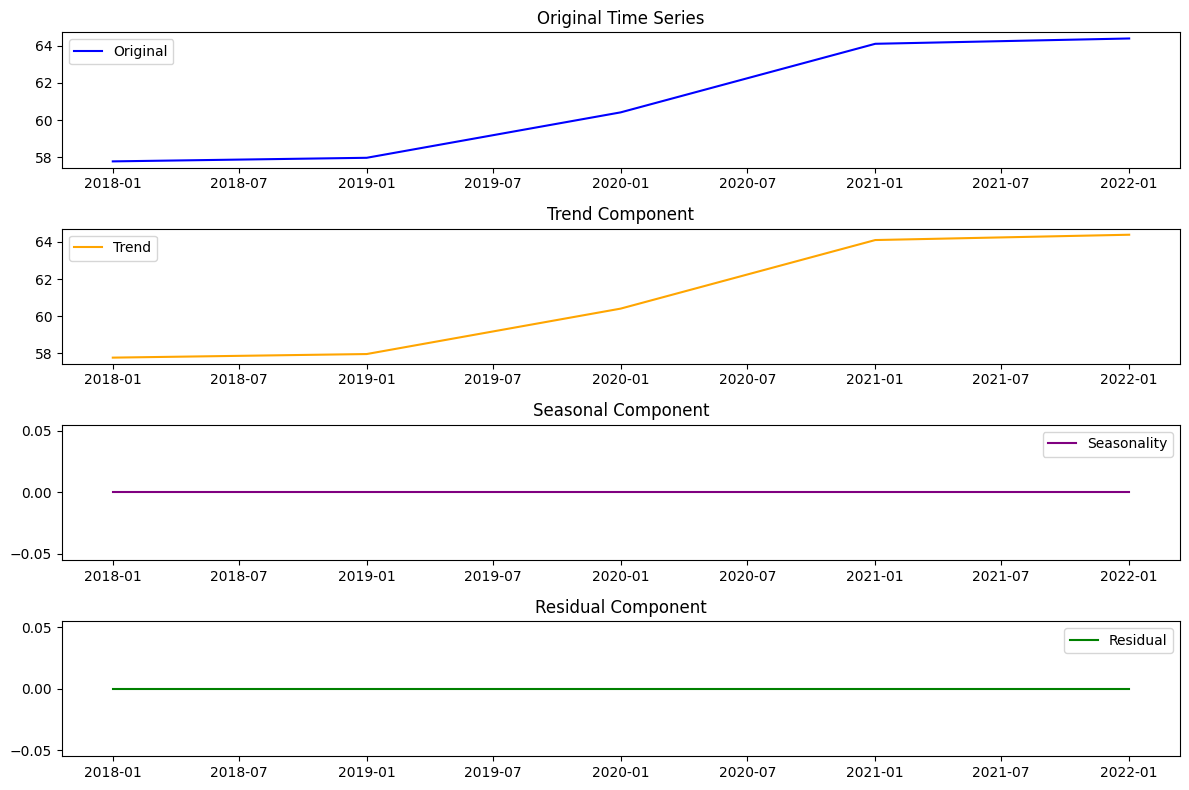

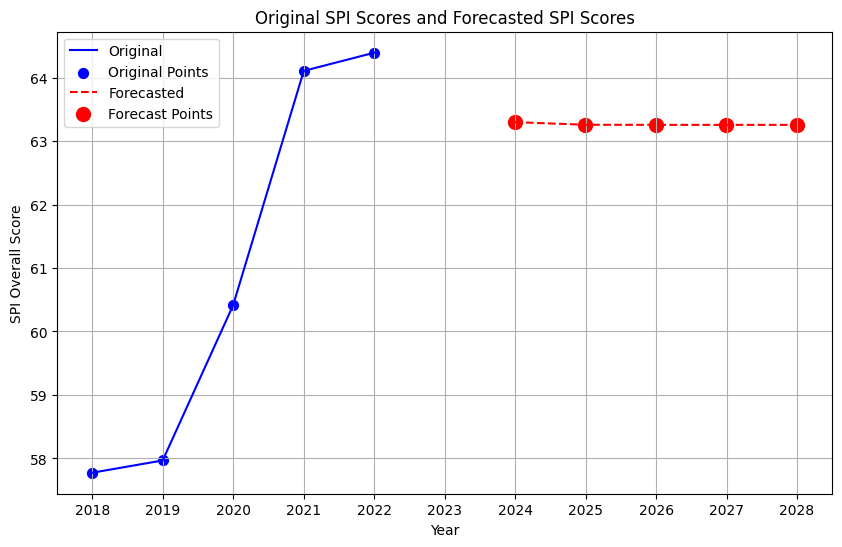

In [6]:
"""........................................Decomposition Time Series Analysis........................................"""

# Decomposition of  SPI  scores over years
mean_scores = df.groupby('year')['SPI Overall Score'].mean().reset_index()

# Convert the DataFrame to a time series
mean_scores.set_index('year', inplace=True)
mean_scores.index = pd.to_datetime(mean_scores.index, format='%Y')

# Decompose the time series with additive model
decomposition = seasonal_decompose(mean_scores['SPI Overall Score'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(mean_scores['SPI Overall Score'], label='Original',color="Blue")
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend',color="Orange")
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality',color="Purple")
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual',color="Green")
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

"""...............................................ARIMA Time Series Analysis........................................."""
#Predicting Time series Analysis for the SPI Mean Scores  with ARIMA
model = ARIMA(mean_scores['SPI Overall Score'], order=[1,1,1])
arima_output = model.fit()

# Forecast future values
forecasting_steps = 5
forecasting = arima_output.forecast(steps=forecasting_steps)

# Create a date range for forecasting
forecasting_dates = pd.date_range(start=mean_scores.index[-1] + pd.DateOffset(years=1), periods=forecasting_steps, freq='Y')

# Create a DataFrame for the forecasted values
forecasting_df = pd.DataFrame({"Date": forecasting_dates, "Forecasting": forecasting})
forecasting_df.set_index("Date", inplace=True)


# Plot the forecasted  results
plt.figure(figsize=(10, 6))

# Plot the original time series
plt.plot(mean_scores.index, mean_scores['SPI Overall Score'], label="Original", color='blue', linestyle='-')
plt.scatter(mean_scores.index, mean_scores['SPI Overall Score'], color='blue', marker='o', s=50, label='Original Points')
# Plot the forecasted time series
plt.plot(forecasting_df.index, forecasting_df['Forecasting'], label="Forecasted", linestyle='--', color='red')
plt.scatter(forecasting_df.index, forecasting_df['Forecasting'], color='red', marker='o', s=100, label='Forecast Points')

# Formatting and showing the plot
plt.legend()
plt.title("Original SPI Scores and Forecasted SPI Scores")
plt.xlabel('Year')
plt.ylabel('SPI Overall Score')
plt.grid(True)
plt.show()